In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

In [2]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
# 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test = X_test.reshape(10000, width*height).astype('float32')/255.0
Y_test = utils.to_categorical(y_test)
print('학습후 테스트 데이터 shape :', X_test.shape, Y_test.shape)

학습후 테스트 데이터 shape : (10000, 784) (10000, 10)


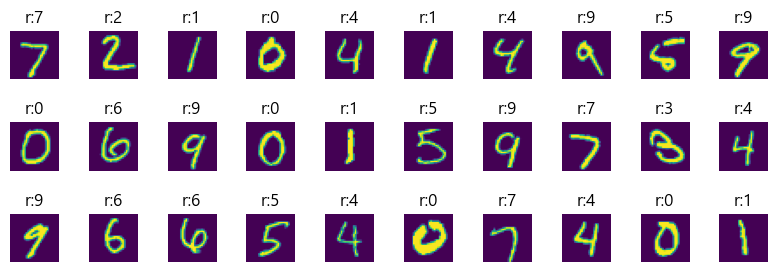

In [37]:
# 모델 학습 후 틀린 데이터 출력용(X_test와 Y_test)
plt_row = 3
plt_col = 10
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic') # 윈도우즈 os
# plt.rc('font', family='NanumBarunGothic') # 코랩 os
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.2)
for i in range(plt_row * plt_col):
    # X_test[i]를 axarr[0, i]에 출력(imshow) Y_test[i].argmax()의 실제값을 title에 출력
    sub_plot = axarr[i//plt_col, i%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    # sub_plot.set_title('실제:' + str(y_test[i]))
    sub_plot.set_title('r:'+str(Y_test[i].argmax()))
    sub_plot.axis('off')

# DNN

(50000, 784) (50000, 10) (10000, 784) (10000, 10) (10000, 784) (10000, 10)
Epoch 1/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2453 - accuracy: 0.9272 - val_loss: 0.1147 - val_accuracy: 0.9650
Epoch 2/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0945 - accuracy: 0.9712 - val_loss: 0.0873 - val_accuracy: 0.9739
Epoch 3/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0773 - val_accuracy: 0.9765
Epoch 4/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.0836 - val_accuracy: 0.9746
Epoch 5/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.0860 - val_accuracy: 0.9755
Epoch 6/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0854 - val_accuracy: 0.9774
Epoch 7/300
1000/1000 [==============================] 

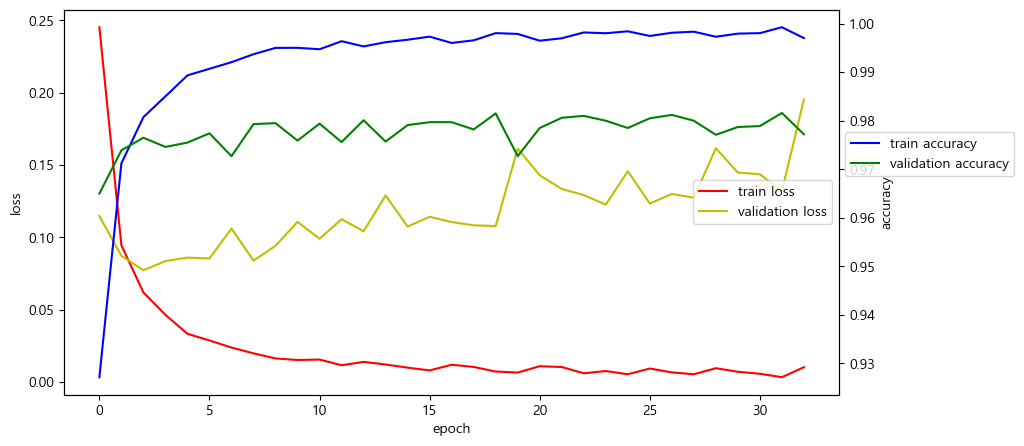

In [42]:
# 1. 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, width*height).astype('float32')/255.0
X_test = X_test.reshape(10000, width*height).astype('float32')/255.0
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:10000
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
#원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val)
Y_test  = utils.to_categorical(y_test)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(width*height, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습시키기
early_stop = EarlyStopping(patience=30)
hist = model.fit(X_train, Y_train,
                epochs=300, batch_size=50,
                validation_data=(X_val, Y_val),
                callbacks=[early_stop])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [44]:
# 모델 평가
loss, acc = model.evaluate(X_test, Y_test)
loss, acc

313/313 [==============================] - 1s 2ms/step - loss: 0.1750 - accuracy: 0.9759


(0.17500156164169312, 0.9758999943733215)

In [53]:
# 성능평가지표 = 교차표
yhat = model.predict(X_test).argmax(axis=1) # 예측치
# print('예측치 :', yhat)
# print('실제값 :', np.argmax(Y_test, axis=1))
print('실제값 :', y_test)
pd.crosstab(y_test, yhat)

313/313 [==============================] - 0s 1ms/step
실제값 : [7 2 1 ... 4 5 6]


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,975,0,2,0,0,0,1,1,1,0
1,0,1125,4,0,0,0,1,2,3,0
2,8,1,1010,1,1,0,2,6,2,1
3,2,0,22,966,0,3,0,8,2,7
4,1,1,2,0,965,0,2,1,0,10
5,7,0,2,7,0,857,8,1,4,6
6,11,2,2,1,4,4,933,0,1,0
7,1,1,9,1,0,0,0,1014,0,2
8,6,0,13,5,0,3,1,7,935,4


In [58]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

array([[ 975,    0,    2,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1125,    4,    0,    0,    0,    1,    2,    3,    0],
       [   8,    1, 1010,    1,    1,    0,    2,    6,    2,    1],
       [   2,    0,   22,  966,    0,    3,    0,    8,    2,    7],
       [   1,    1,    2,    0,  965,    0,    2,    1,    0,   10],
       [   7,    0,    2,    7,    0,  857,    8,    1,    4,    6],
       [  11,    2,    2,    1,    4,    4,  933,    0,    1,    0],
       [   1,    1,    9,    1,    0,    0,    0, 1014,    0,    2],
       [   6,    0,   13,    5,    0,    3,    1,    7,  935,    4],
       [   8,    3,    6,    0,    2,    2,    0,    9,    0,  979]],
      dtype=int64)

In [61]:
cnt = 0 # 실제값과 예측값이 다른 갯수
for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i!=j:
            cnt += data
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 241


In [63]:
# yhat : 예측치
# y_test : 실제값
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 241


i = 10000
cnt = 241


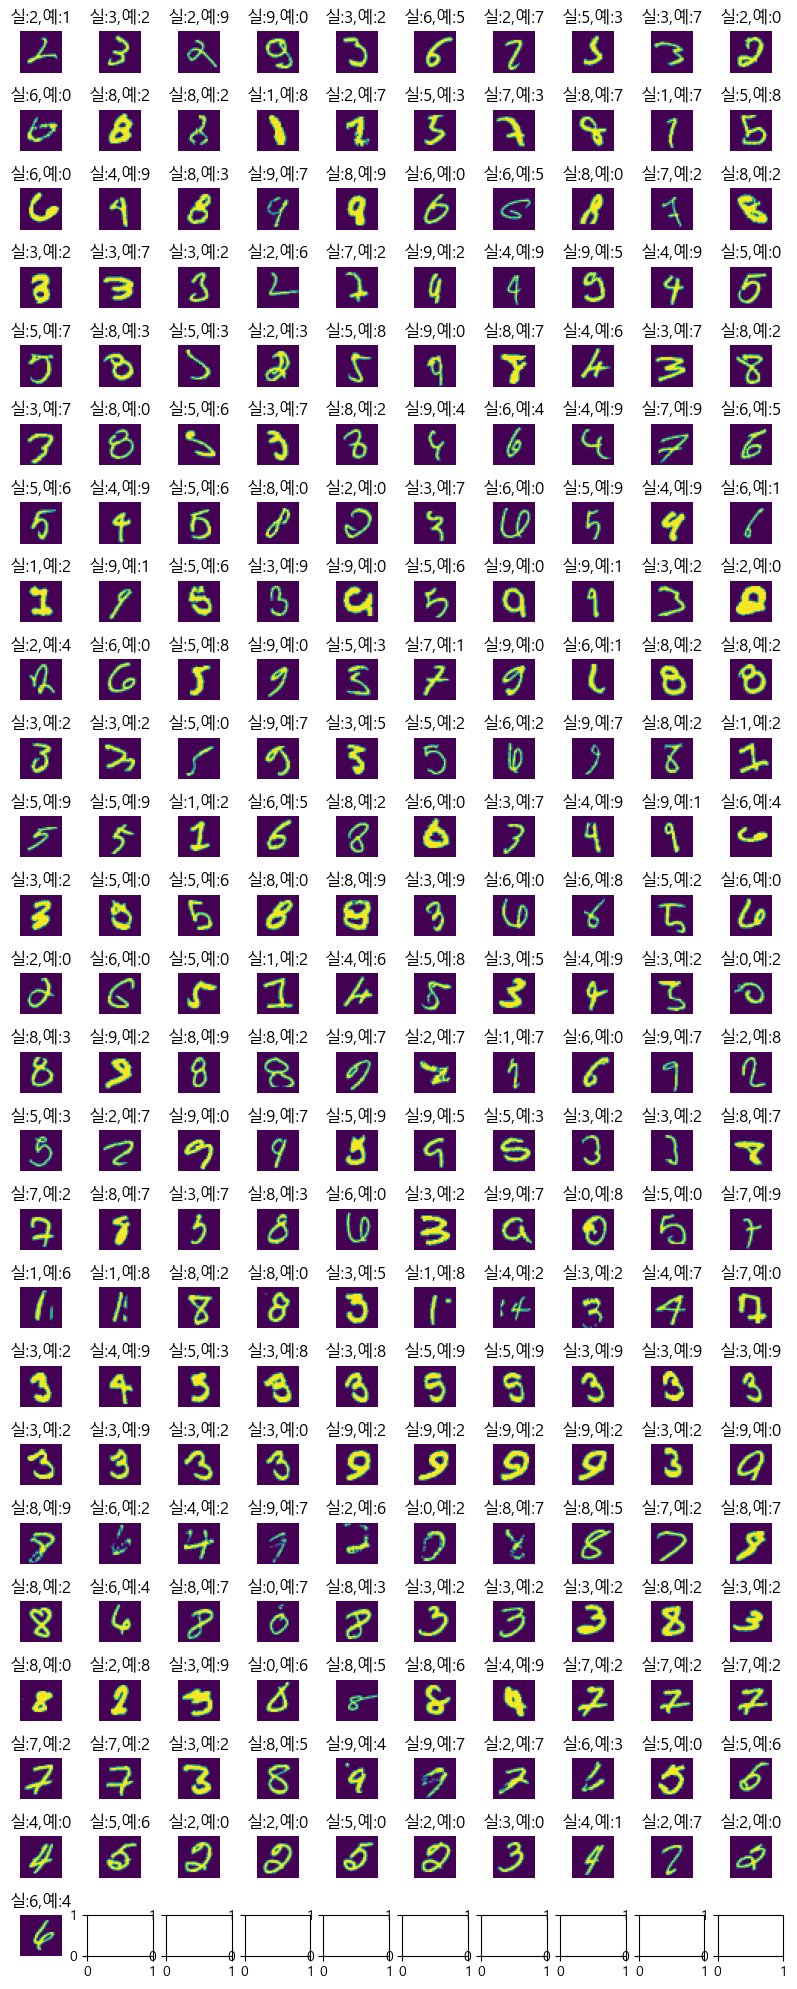

In [75]:
# 모델 학습 후 틀린 데이터 출력용(X_test와 Y_test)
plt_row = 25
plt_col = 10
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic') # 윈도우즈 os
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.2)

i = 0 # yhat과 y_test를 액세스할 index
cnt = 0 # 출력할 횟수
while (cnt<plt_row*plt_col) & (i < len(y_test)):
    # 예측한 결과가 틀렸을 경우만 imshow(X_test[i]), 실제값과 예측치를 title에 출력
    if yhat[i]==y_test[i]:
        i += 1
        continue
    # 예측한 값과 실제값이 다른 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = '실:{},예:{}'.format(y_test[i], yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i =', i)
print('cnt =',cnt)

# CNN
- 컨볼류션 레이어 -> max pooling -> DNN (교안 35pt)

In [4]:
# 1. 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, width, height, 1).astype('float32')/255.0
X_test = X_test.reshape(10000, width, height, 1).astype('float32')/255.0
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:10000
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
#원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val)
Y_test  = utils.to_categorical(y_test)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# 2. 모델생성
 # Conv(3*3짜리 커널 32개) 28*28 => 28*28*32
 # MaxPooling (2*2 사이즈) 14*14*32
 # Dropout
 # Conv(3*3짜리 커널 64개) 12*12*32*64
 # MaxPooling (2*2 사이즈) 6*6*32*64
 # 1차원 데이터로 만들기
 # DNN(hidden layer 128 units 한층-output layer)
model = Sequential()
model.add(Conv2D(32, # 커널 갯수
                3,   # 커널 사이즈
                padding='same', # 입력층과 출력층의 갯수를 같게 (외곽에 의미 없는 값으로 메꿔 줌)
                activation='relu',
                input_shape=(width, height, 1)                 
                ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
model.summary()

(50000, 28, 28, 1) (50000, 10) (10000, 28, 28, 1) (10000, 10) (10000, 28, 28, 1) (10000, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                             

In [5]:
# 3. 학습 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 4. 학습시키기
earlystop = EarlyStopping(patience=20)
hist = model.fit(X_train, Y_train,
                epochs=50, 
                batch_size=32, 
                validation_data=(X_val, Y_val),
                callbacks=[earlystop])

Epoch 1/50
1563/1563 [==============================] - 11s 5ms/step - loss: 0.2516 - accuracy: 0.9227 - val_loss: 0.0520 - val_accuracy: 0.9855
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0931 - accuracy: 0.9725 - val_loss: 0.0468 - val_accuracy: 0.9864
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0698 - accuracy: 0.9794 - val_loss: 0.0428 - val_accuracy: 0.9882
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0590 - accuracy: 0.9819 - val_loss: 0.0325 - val_accuracy: 0.9911
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.0320 - val_accuracy: 0.9908
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.0390 - val_accuracy: 0.9898
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0416 - accuracy: 0.9866 - val_loss: 0.0293 - val_accuracy

In [6]:
model.save('model/mnist_cnn.h5')

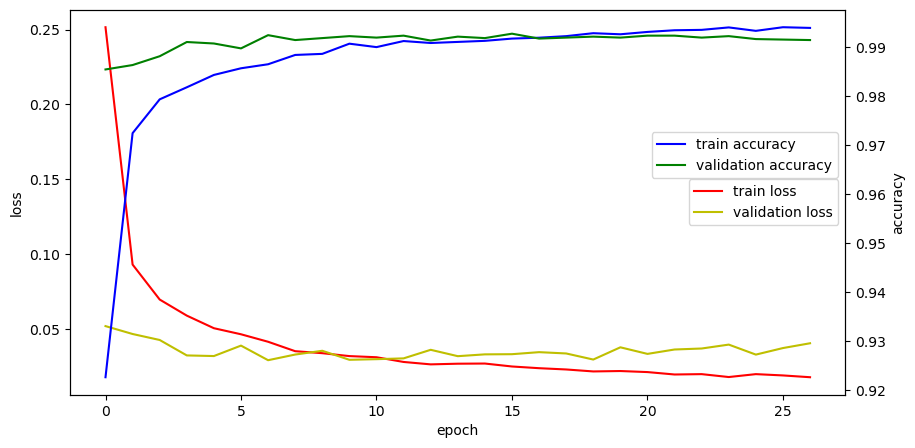

In [7]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [8]:
loss, accuracy = model.evaluate(X_val, Y_val)
loss, accuracy

313/313 [==============================] - 1s 5ms/step - loss: 0.0406 - accuracy: 0.9915


(0.04057559370994568, 0.9915000200271606)

In [10]:
# 예측치와 실제값을 이용해서 교차표
yhat = model.predict(X_test).argmax(axis=1)
pd.crosstab(y_test, yhat)

313/313 [==============================] - 1s 2ms/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,979,0,0,0,0,0,0,1,0,0
1,0,1134,0,1,0,0,0,0,0,0
2,1,1,1028,0,0,0,0,2,0,0
3,0,0,1,1005,0,3,0,1,0,0
4,0,0,0,0,972,0,3,1,1,5
5,0,0,0,7,0,882,2,1,0,0
6,4,2,0,0,0,3,948,0,1,0
7,0,2,7,0,0,0,0,1019,0,0
8,2,0,2,0,0,1,0,1,967,1


In [11]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 71


i = 10000
cnt = 71


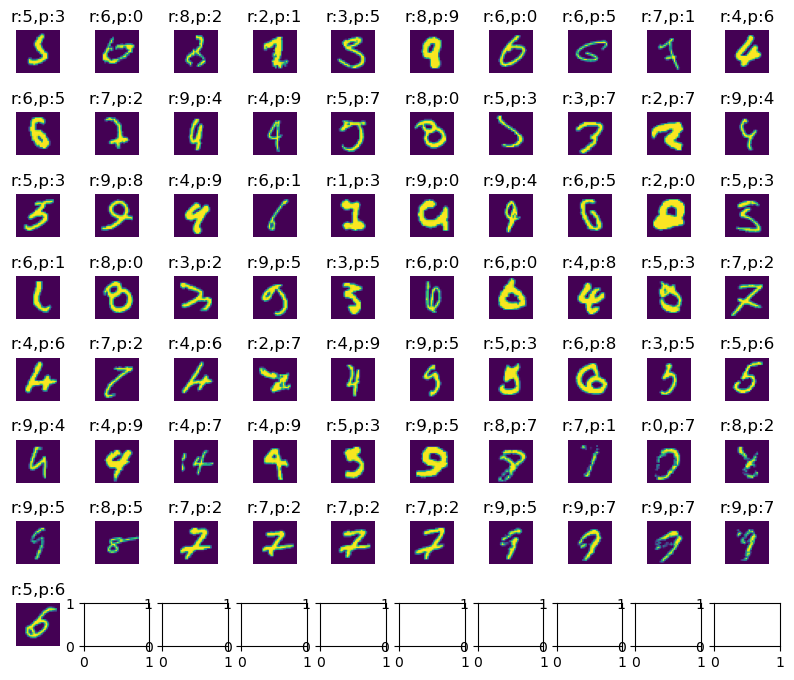

In [12]:
# 모델 학습 후 예측이 틀린 경우만 출력
plt_row = 8
plt_col = 10
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
# plt.rc('font', family='Malgun Gothic') # 윈도우즈 os
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.2)

i = 0 # yhat과 y_test를 액세스할 index
cnt = 0 # 출력할 횟수
while (cnt<plt_row*plt_col) & (i < len(y_test)):
    # 예측한 결과가 틀렸을 경우만 imshow(X_test[i]), 실제값과 예측치를 title에 출력
    if yhat[i]==y_test[i]:
        i += 1
        continue
    # 예측한 값과 실제값이 다른 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = 'r:{},p:{}'.format(y_test[i], yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i =', i)
print('cnt =',cnt)